# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


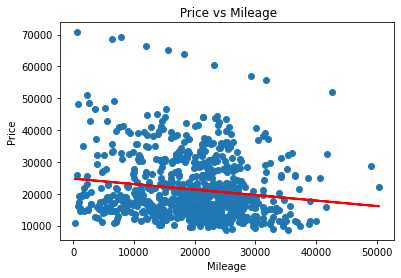

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)


x=df['Mileage'].values.reshape(-1,1)
y=df['Price'].values
model.fit(x,y)
y_pred = model.predict(x)
plt.scatter(x,y)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title( ' Price vs Mileage')
plt.show()

In [5]:
print("Intercept:", model.intercept_)
print("Coefficient:",model.coef_)

from sklearn.metrics import r2_score
print("R^2 score:", r2_score(y, y_pred))

Intercept: 24764.559006061685
Coefficient: [-0.1725205]
R^2 score: 0.02046344732348926


Regression on Numerical data 

In [7]:
x1=df[[ 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound','Leather']].values
y1=df['Price'].values

model1 = LinearRegression(fit_intercept=True)
model1.fit(x1,y)
y_pred1 = model1.predict(x1)

print("Intercept:", model1.intercept_)
print("Coefficient:",model1.coef_)

from sklearn.metrics import r2_score
print("R^2 score:", r2_score(y, y_pred1))


Intercept: 6758.755143598099
Coefficient: [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03]
R^2 score: 0.446264353672838


Finding Highly correlated features

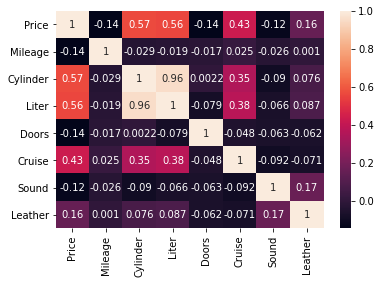

In [8]:
sns.heatmap(df.corr(),annot=True)

Removing Liter as highly correlated feature


In [ ]:
Selected_features=X=df[[ 'Mileage', 'Cylinder', 'Cruise','Doors', 'Sound','Leather']].values
y=df['Price'].values

model2 = LinearRegression(fit_intercept=True)
model2.fit(Selected_features,y)
y_pred2 = model2.predict(Selected_features)
print("Intercept:", model1.intercept_)
print("Coefficient:",model1.coef_)

from sklearn.metrics import r2_score
print("R^2 score:", r2_score(y, y_pred2))

Encoding categorical variable into one-hot 

In [ ]:
dummy=pd.get_dummies(df[['Make',	'Model',	'Trim',	'Type']])
Newdf=pd.concat([df[[ 'Mileage', 'Cylinder', 'Cruise','Doors', 'Sound','Leather']],dummy],axis=1)

In [ ]:
Newdf

,Mileage,Cylinder,Cruise,Doors,Sound,Leather,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,Model_9_5 HO,Model_AVEO,Model_Bonneville,Model_CST-V,Model_CTS,Model_Cavalier,Model_Century,Model_Classic,Model_Cobalt,Model_Corvette,Model_Deville,Model_G6,Model_GTO,Model_Grand Am,Model_Grand Prix,Model_Impala,Model_Ion,Model_L Series,Model_Lacrosse,Model_Lesabre,Model_Malibu,Model_Monte Carlo,Model_Park Avenue,Model_STS-V6,...,Trim_Custom Sedan 4D,Trim_DHS Sedan 4D,Trim_DTS Sedan 4D,Trim_GT Coupe 2D,Trim_GT Sedan 4D,Trim_GT Sportwagon,Trim_GTP Sedan 4D,Trim_GXP Sedan 4D,Trim_Hardtop Conv 2D,Trim_L300 Sedan 4D,Trim_LS Coupe 2D,Trim_LS Hatchback 4D,Trim_LS MAXX Hback 4D,Trim_LS Sedan 4D,Trim_LS Sport Coupe 2D,Trim_LS Sport Sedan 4D,Trim_LT Coupe 2D,Trim_LT Hatchback 4D,Trim_LT MAXX Hback 4D,Trim_LT Sedan 4D,Trim_Limited Sedan 4D,Trim_Linear Conv 2D,Trim_Linear Sedan 4D,Trim_Linear Wagon 4D,Trim_MAXX Hback 4D,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,8221,6,1,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,9135,6,1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,13196,6,1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,16342,6,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,19832,6,1,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16229,6,1,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
800,19095,6,1,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
801,20484,6,1,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
802,25979,6,1,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Regression fitting on  categorical data

In [ ]:


model3 = LinearRegression(fit_intercept=True)
model3.fit(dummy,y)
y_pred3 = model3.predict(dummy)
print("Intercept:", model3.intercept_)
print("Coefficient:",model3.coef_)

from sklearn.metrics import r2_score
print("R^2 score:", r2_score(y, y_pred3))

Intercept: 7.45718238711433e+16
Coefficient: [-1.26919982e+16 -9.06450921e+15 -1.74508197e+16 -1.86901028e+15
 -1.53980552e+16  2.40371448e+16  3.37790661e+15  1.58033141e+16
  3.37790661e+15  3.37790661e+15  3.37790661e+15  1.54222127e+16
  1.38673194e+16  7.03590222e+15  7.03590222e+15  1.54222127e+16
  1.06633912e+16  1.54222127e+16  1.54222127e+16  1.54222127e+16
  7.03590222e+15 -1.59596715e+14 -1.59596715e+14  1.38673194e+16
 -1.59596715e+14  1.54222127e+16 -2.60657518e+16  4.31024280e+15
 -7.18288601e+16  3.79027395e+16  1.54222127e+16  1.54222127e+16
  1.06633912e+16  7.03590222e+15  7.03590222e+15 -1.59596715e+14
 -3.31256637e+16  1.64299182e+15  6.05548933e+15  8.39074454e+15
  4.91815329e+16 -1.69190361e+16  8.39074454e+15  4.91815329e+16
 -1.69190361e+16  1.21682243e+17  1.21682243e+17  1.21682243e+17
 -1.60079708e+15 -2.04275512e+16  1.19506430e+16  3.91899913e+16
  3.91899913e+16 -3.44544673e+16  3.91899913e+16  6.05548933e+15
  3.91899913e+16  2.51630752e+16  3.79211332e

Important features

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=10)
X_train_fs=fs.fit_transform(dummy, y)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

